# Actividad

- **Nombre**: Jesús Gabriel Riestra Castillo
- **Matrícula**: A01114851

# Entregar 
Archivo PDF de la actividad y la liga de la actividad en su repostitorio.

# Nota: 
Todas las tareas entregadas fuera de la fecha limite se califican sobre 50 de los 100 puntos posibles.

In [1]:
# Si trabajamos en Google Colaboratory corremos las siguientes lineas de código
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# Nos cambiamos a la carpeta donde tengamos el repositorio
%cd 'drive/MyDrive/SemanaTec/Repos/arte-analitica'

/content/drive/MyDrive/SemanaTec/Repos/arte-analitica


# Highway MPG dataset

Este dataset contiene variables medidas por la agencia de protección ambiental de 38 modelos de vehículo diferentes de 1999 a 2008. Las variables que se registraron fueron:

* **manufacturer**: nombre del fabricante.
* **model**: nombre del modelo.
* **displ**: desplacamiento del motor, en litros.
* **year**: año de fabricación.
* **cyl**: número de cilindros.
* **trans**: tipo de transmisión.
* **drv**: tipo de tracción, f-delantera, r-trasera, 4- 4 llantas
* **cty**: rendimiento del motor en ciudad, en millas por galón.
* **hwy**: rendimiento del motor en carretera, en millas por galón.
* **fl**: tipo de combustible.
* **class**: tipo de vehículo.

In [5]:
# Carga las librerías y datos
import numpy as np
import pandas as pd
# Matplotlib lo utilizamos con el acrónimo plt
import matplotlib.pyplot as plt
# Seaborn lo utilizamos con el acrónimo sns
import seaborn as sns
sns.set()

autos_df = pd.read_csv('data/auto-mpg.csv')
autos_df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


Text(0.5, 1.0, 'Observaciones de cada fabricante')

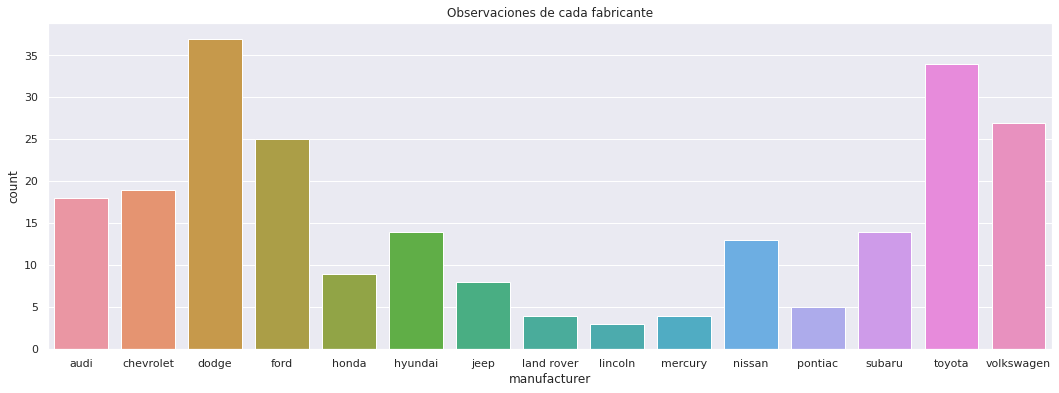

In [16]:
# ¿Cuántas observaciones hay de cada fabricante? Muéstralo en un gráfico.

fig = plt.figure(figsize=(18, 6))

sns.countplot(data=autos_df, x='manufacturer')

plt.title('Observaciones de cada fabricante')



Text(0.5, 1.0, 'Histograma de hwy')

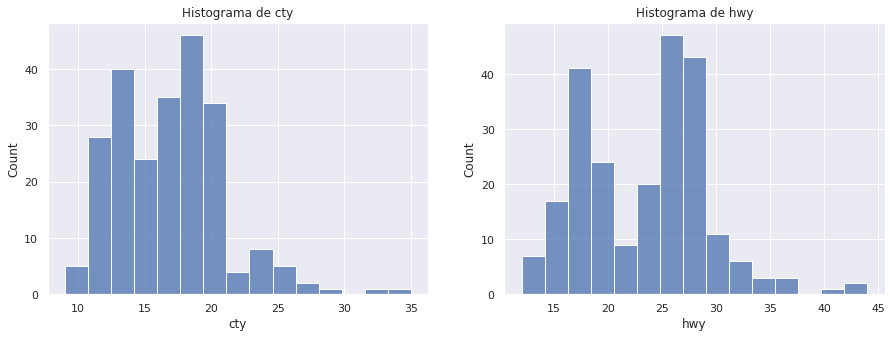

In [30]:
# Haz un histograma de las variables numéricas cty, hwy y haz una comparación en un gráfico lado a lado



fig, axs = plt.subplots(1,2, figsize=(15, 5))

# Crear el histograma de cty
sns.histplot(data = autos_df, x = 'cty', bins=15, ax=axs[0])
axs[0].set_title('Histograma de cty')

# Crear el histograma de hwy
sns.histplot(data = autos_df, x = 'hwy', bins=15, ax=axs[1])

axs[1].set_title('Histograma de hwy')




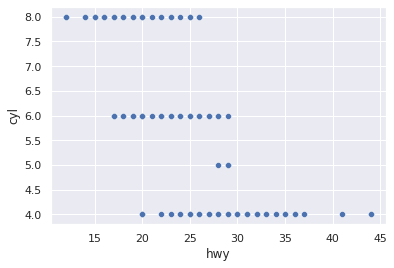

In [40]:
# ¿Cómo se comparar el rendimiento en carretera (hwy) contra el número de cilindros? 
# Haz un gráfico que represente esta relación.

sns.scatterplot(data=autos_df, x = 'hwy', y = 'cyl')







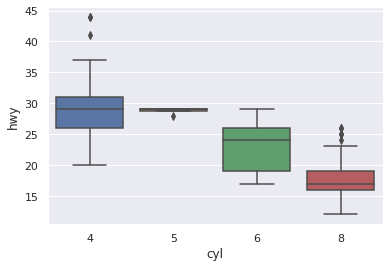

In [32]:
# cyl es una variable numérica, pero como tiene pocos valores podemos tomarla como si fuera categórica.
# ¿De qué otra forma se puede representar la relación de la pregunta anterior?

sns.boxplot(data=autos_df, y='hwy', x='cyl')



In [33]:
autos_df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


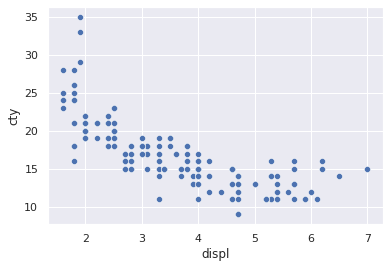

In [34]:
# Cuál es la relación entre el desplazamiento del motor y el rendimiento dentro de la ciudad?

sns.scatterplot(data=autos_df, x='displ',y='cty')



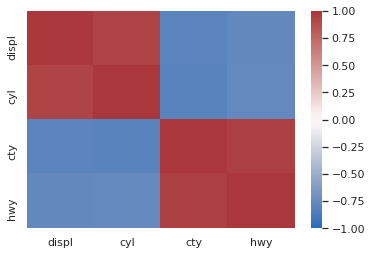

In [37]:
# ¿Cómo se correlacionan las variables numéricas? Muestra esta correlación en un gráfico. (No tomar en cuenta el año como
# variable numérica)

# Sugerencia: usa la paleta de colores 'vlag' o una paleta DIVERGENTE

matriz_corr = autos_df.drop('year', axis=1).corr()
matriz_corr
sns.heatmap(data=matriz_corr, vmin=-1, vmax=1, cmap='vlag')


In [ ]:
# ¿Cuales variables tienen una fuerte relación positiva entre sí y cuáles tienen una fuerte relación negativa?



El desplazamiento del motor y el número de cilindros tienen fuerte relación. El desplazamiento y el rendimiento en carretera y el rendimiento en ciudad se relacionan negativamente.

In [57]:
# ¿Los fabricantes mejoran el rendimiento en ciudad conforme pasa el tiempo? Haz una tabla resumen por año y por marca del
# rendimiento promedio y grafica los resultados.

datos = autos_df.groupby(['manufacturer', 'year'])['cty'].mean()
datos.head()




manufacturer  year
audi          1999    17.111111
              2008    18.111111
chevrolet     1999    15.142857
              2008    14.916667
dodge         1999    13.375000
Name: cty, dtype: float64

In [58]:
datos = datos.to_frame('Rendimiento en ciudad promedio')
datos.head()

Rendimiento en ciudad promedio
manufacturer year                                
audi         1999                       17.111111
             2008                       18.111111
chevrolet    1999                       15.142857
             2008                       14.916667
dodge        1999                       13.375000

In [59]:
datos = datos.reset_index()
datos.head()



,manufacturer,year,Rendimiento en ciudad promedio
0,audi,1999,17.111111
1,audi,2008,18.111111
2,chevrolet,1999,15.142857
3,chevrolet,2008,14.916667
4,dodge,1999,13.375000


In [60]:
datos_pivote = pd.pivot_table(data=datos, index='year', columns='manufacturer', 
                              values='Rendimiento en ciudad promedio', aggfunc=np.mean)
datos_pivote

manufacturer,audi,chevrolet,dodge,ford,honda,hyundai,jeep,land rover,lincoln,mercury,nissan,pontiac,subaru,toyota,volkswagen
year,,,,,,,,,,,,,,,
1999,17.111111,15.142857,13.375000,13.933333,24.8,18.333333,14.500000,11.0,11.0,13.5,17.666667,17.0,19.0,18.150000,21.250000
2008,18.111111,14.916667,12.952381,14.100000,24.0,18.875000,13.166667,12.0,12.0,13.0,18.428571,17.0,19.5,19.071429,20.454545


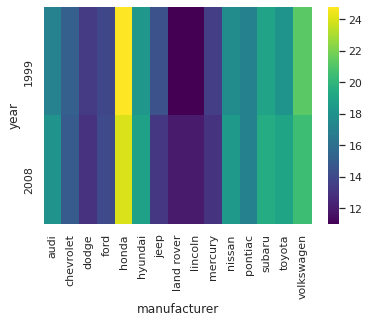

In [61]:
sns.heatmap(data=datos_pivote, cmap='viridis')